# Загрузка и предобработка данных 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

import time
import datetime

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Downloads/features.csv', index_col='match_id')

In [3]:
data.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [4]:
data.shape

(97230, 108)

In [5]:
data.columns.values

array(['start_time', 'lobby_type', 'r1_hero', 'r1_level', 'r1_xp',
       'r1_gold', 'r1_lh', 'r1_kills', 'r1_deaths', 'r1_items', 'r2_hero',
       'r2_level', 'r2_xp', 'r2_gold', 'r2_lh', 'r2_kills', 'r2_deaths',
       'r2_items', 'r3_hero', 'r3_level', 'r3_xp', 'r3_gold', 'r3_lh',
       'r3_kills', 'r3_deaths', 'r3_items', 'r4_hero', 'r4_level',
       'r4_xp', 'r4_gold', 'r4_lh', 'r4_kills', 'r4_deaths', 'r4_items',
       'r5_hero', 'r5_level', 'r5_xp', 'r5_gold', 'r5_lh', 'r5_kills',
       'r5_deaths', 'r5_items', 'd1_hero', 'd1_level', 'd1_xp', 'd1_gold',
       'd1_lh', 'd1_kills', 'd1_deaths', 'd1_items', 'd2_hero',
       'd2_level', 'd2_xp', 'd2_gold', 'd2_lh', 'd2_kills', 'd2_deaths',
       'd2_items', 'd3_hero', 'd3_level', 'd3_xp', 'd3_gold', 'd3_lh',
       'd3_kills', 'd3_deaths', 'd3_items', 'd4_hero', 'd4_level',
       'd4_xp', 'd4_gold', 'd4_lh', 'd4_kills', 'd4_deaths', 'd4_items',
       'd5_hero', 'd5_level', 'd5_xp', 'd5_gold', 'd5_lh', 'd5_kills',
       'd

### Вопрос 1.1

Значения пропущены в столбцах, которые отвечают за различные события. Пропуск означает, что это событие не произошло за первые 5 минут матча.

In [6]:
for i in data.columns:
    if data[i].count()!=len(data):
        print(i)

first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_first_ward_time
dire_bottle_time
dire_courier_time
dire_flying_courier_time
dire_first_ward_time


In [7]:
data.fillna(0, inplace = True)

### Вопрос 1.2

Целевая переменная содержится в столбце radiant_win

In [8]:
y = data.radiant_win

In [9]:
data = data.drop(['duration','radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant'\
                 , 'barracks_status_dire'], axis = 1)

# Градиентный бустинг

In [10]:
kf = KFold(n_splits = 5, random_state=241, shuffle=True)

### Вопрос 1.3
Используем для кросс-валидации всю выборку.

In [11]:
for k in [10,20,30,40,50]:
    start_time = datetime.datetime.now()

    clf = GradientBoostingClassifier(n_estimators=k, random_state=241)
    score = cross_val_score(clf, X = data, y = y, cv = kf, scoring = 'roc_auc')
    score_norm = np.mean(score, axis=0)
    
    print ('{} - Time elapsed:'.format(k), datetime.datetime.now() - start_time,  'Score_norm:', score_norm)

10 - Time elapsed: 0:00:35.256349 Score_norm: 0.6643877206345741
20 - Time elapsed: 0:01:09.050504 Score_norm: 0.6828535735340823
30 - Time elapsed: 0:01:42.779178 Score_norm: 0.6894962060591201
40 - Time elapsed: 0:02:17.808862 Score_norm: 0.6941311214730338
50 - Time elapsed: 0:02:53.765148 Score_norm: 0.6974548316948366


Классификатор настраивается долго. \
Например, для 30 деревьев затраченное время - 0:01:42, качество на кросс-валидации - 0.69\
\
Для повышения скорости на кросс-валидации будем использовать половину выборки и уменьшим максимальную глубину дерева.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5, random_state=241)

In [101]:
scores = list()
estimators = [10,20,30,40,50,80,100,150]
for k in estimators:
    start_time = datetime.datetime.now()

    clf = GradientBoostingClassifier(n_estimators=k, random_state=241, max_depth = 2)
    score = cross_val_score(clf, X = X_train, y = y_train, cv = kf, scoring = 'roc_auc')
    score_norm = np.mean(score, axis=0)
    scores.append(score_norm)
    
    print ('{} - Time elapsed:'.format(k), datetime.datetime.now() - start_time,  'Score_norm:', score_norm)

10 - Time elapsed: 0:00:12.083808 Score_norm: 0.6516004488181601
20 - Time elapsed: 0:00:25.856951 Score_norm: 0.6709798580296918
30 - Time elapsed: 0:00:35.776193 Score_norm: 0.6805633099208099
40 - Time elapsed: 0:00:46.478068 Score_norm: 0.6848197750002187
50 - Time elapsed: 0:00:58.700130 Score_norm: 0.6883217644516753
80 - Time elapsed: 0:01:32.387350 Score_norm: 0.6959639977610795
100 - Time elapsed: 0:01:57.617724 Score_norm: 0.6993575071162461
150 - Time elapsed: 0:02:54.739110 Score_norm: 0.7046065718823884


Время настройки классификатора уменьшилось, качество пострадало примерно на 0.01. Но результат приемлемый. \
Дополнительно можно сравнить работу градиентного бустинга и классификатора AdaBoost.

In [16]:
# AdaBoost (максимальная глубина дерева по умолчанию 1)
start_time = datetime.datetime.now()

clf_ab = AdaBoostClassifier(n_estimators = 20, random_state=241)
score_ab = cross_val_score(clf_ab, X = X_train, y = y_train, cv = kf, scoring = 'roc_auc')
score_norm_ab = np.mean(score_ab, axis=0)

print ('{} - Time elapsed:'.format(20), datetime.datetime.now() - start_time,  'Score_norm:', score_norm_ab)

20 - Time elapsed: 0:00:14.076448 Score_norm: 0.6816978212880292


In [17]:
# Градиентный бустинг (выставим максимальную глубину дерева вручную)
start_time = datetime.datetime.now()

clf = GradientBoostingClassifier(n_estimators=20, random_state=241, max_depth = 1)
score = cross_val_score(clf, X = X_train, y = y_train, cv = kf, scoring = 'roc_auc')
score_norm = np.mean(score, axis=0)

print ('{} - Time elapsed:'.format(20), datetime.datetime.now() - start_time,  'Score_norm:', score_norm)

20 - Time elapsed: 0:00:11.758324 Score_norm: 0.6513932673523224


AdaBoost показал себя лучше скорее всего из-за разных значений learning_rate
### Вопрос 1.4
С помощью графика значений ошибок для различных значений n_estimators сделаем вывод о том, стоит ли увеличивать количество деревьев.

In [22]:
estimators = [10,20,30,40,50,80,100,150]

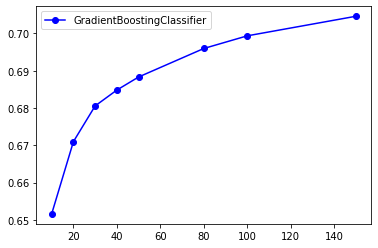

In [102]:
# исследуем, насколько имеет смысл увеличивать кол-во базовых классификаторов
plt.plot(estimators, scores, 'bo-')
plt.legend(['GradientBoostingClassifier', 'AdaBoost'])
plt.show()

Качество на кросс-валидации увеличивается, но темпы роста уменьшаются.

# ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [31]:
for c in np.logspace(-2,2, num = 5):
    start_time = datetime.datetime.now()
    
    clf_lr = LogisticRegression(C = c)
    score = cross_val_score(clf_lr, X = data, y = y, cv = kf, scoring = 'roc_auc')
    score_norm = np.mean(score, axis=0)
    
    print ('C={} - Time elapsed:'.format(c), datetime.datetime.now() - start_time,  ' Score_norm:', score_norm)

C=0.01 - Time elapsed: 0:00:01.001750  Score_norm: 0.5134556409261802
C=0.1 - Time elapsed: 0:00:00.980119  Score_norm: 0.5134556409261802
C=1.0 - Time elapsed: 0:00:00.992973  Score_norm: 0.5134556409261802
C=10.0 - Time elapsed: 0:00:00.973388  Score_norm: 0.5134556409261802
C=100.0 - Time elapsed: 0:00:00.977575  Score_norm: 0.5134556409261802


Линейные модели требуют предобработки данных, масштабируем числовые признаки.

In [103]:
# отдельно выделим категориальные признаки (персонажи игроков и тип комнаты)
categ = ['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero', 'd1_hero', 'd2_hero',\
          'd3_hero', 'd4_hero', 'd5_hero']

In [104]:
scaler = StandardScaler()
data_sc = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [105]:
kf = KFold(n_splits = 5, random_state=241, shuffle=True)

Используем на кросс-валидации всю выборку
### Вопрос 2.1

In [106]:
# чем выше коэффициент C, тем слабее регуляризации 
for c in np.logspace(-2,2, num = 5):
    start_time = datetime.datetime.now()
    
    clf_lr = LogisticRegression(C = c)
    score = cross_val_score(clf_lr, X = data_sc, y = y, cv = kf, scoring = 'roc_auc')
    score_norm = np.mean(score, axis=0)
    
    print ('C={} - Time elapsed:'.format(c), datetime.datetime.now() - start_time, ' Score_norm:', score_norm)

C=0.01 - Time elapsed: 0:00:02.326500  Score_norm: 0.7163420915422014
C=0.1 - Time elapsed: 0:00:02.451916  Score_norm: 0.7163104821911903
C=1.0 - Time elapsed: 0:00:02.391644  Score_norm: 0.7163066323165939
C=10.0 - Time elapsed: 0:00:02.367408  Score_norm: 0.7163062740151922
C=100.0 - Time elapsed: 0:00:02.522700  Score_norm: 0.7163067404065245


In [107]:
data_sc.head(3)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,-2.544364,1.540688,-1.244228,1.400808,1.525972,0.734957,0.969743,-0.537757,-0.578083,-0.509023,...,-0.987486,1.066448,-0.041743,-0.262922,0.640648,0.018054,0.562864,-0.551154,1.846004,-1.121494
1,-2.540452,-0.927798,-0.292258,0.501314,-0.080139,-0.247570,-0.246859,-0.537757,1.017574,1.492930,...,-0.987486,-0.338591,0.578946,-0.262922,0.379585,1.066668,0.562864,0.678170,0.437788,0.043947
2,-2.539231,1.540688,-0.568637,0.501314,0.151070,0.263085,1.190944,-0.537757,-0.578083,1.492930,...,0.391203,-0.823968,-0.824352,0.158654,0.640648,0.018054,0.562864,0.678170,0.437788,0.490286


По сравнению с градиентными бустингом, скорость выше, качество лучше. \
Мы не учитывали наличие категориальных признаков. Для начала попробуем их удалить.

In [108]:
data_sc_cl = data_sc.drop(categ, axis = 1)

In [109]:
data_sc_cl.head(3)

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,-2.544364,1.400808,1.525972,0.734957,0.969743,-0.537757,-0.578083,-0.509023,-0.332256,-0.625222,...,-0.987486,1.066448,-0.041743,-0.262922,0.640648,0.018054,0.562864,-0.551154,1.846004,-1.121494
1,-2.540452,0.501314,-0.080139,-0.247570,-0.246859,-0.537757,1.017574,1.492930,0.578881,0.732454,...,-0.987486,-0.338591,0.578946,-0.262922,0.379585,1.066668,0.562864,0.678170,0.437788,0.043947
2,-2.539231,0.501314,0.151070,0.263085,1.190944,-0.537757,-0.578083,1.492930,-0.332256,0.224676,...,0.391203,-0.823968,-0.824352,0.158654,0.640648,0.018054,0.562864,0.678170,0.437788,0.490286


### Вопрос 2.2

In [110]:
for c in np.logspace(-2,2, num = 5):
    start_time = datetime.datetime.now()
    
    clf_lr = LogisticRegression(C = c)
    score = cross_val_score(clf_lr, X = data_sc_cl, y = y, cv = kf, scoring = 'roc_auc')
    score_norm = np.mean(score, axis=0)
    
    print ('C={} - Time elapsed:'.format(c), datetime.datetime.now() - start_time,  ' Score_norm:', score_norm)

C=0.01 - Time elapsed: 0:00:02.091892  Score_norm: 0.7164004932889204
C=0.1 - Time elapsed: 0:00:02.324698  Score_norm: 0.7163745519438582
C=1.0 - Time elapsed: 0:00:02.235164  Score_norm: 0.7163709541660922
C=10.0 - Time elapsed: 0:00:02.144730  Score_norm: 0.7163708209539857
C=100.0 - Time elapsed: 0:00:02.382829  Score_norm: 0.7163706069067349


Качество не изменилось. Скорость тоже
### Вопрос 2.3
Также есть возможность использовать мешок слов

In [60]:
s = pd.unique(data[['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero', 'd1_hero', 'd2_hero',\
          'd3_hero', 'd4_hero', 'd5_hero']].values.ravel())
s = list(s)
print(s, '\n', 'len - ', len(s))

[11, 67, 29, 20, 105, 4, 42, 21, 37, 84, 49, 26, 39, 88, 79, 7, 12, 33, 98, 27, 22, 66, 86, 80, 30, 75, 41, 96, 48, 15, 102, 13, 72, 93, 69, 25, 8, 28, 65, 55, 52, 3, 73, 57, 36, 101, 47, 35, 83, 100, 44, 17, 91, 53, 90, 19, 74, 76, 99, 1, 94, 82, 60, 112, 31, 85, 61, 70, 68, 51, 2, 50, 71, 23, 77, 16, 63, 92, 81, 18, 59, 95, 64, 58, 43, 104, 40, 87, 10, 14, 110, 38, 46, 54, 97, 89, 5, 62, 6, 78, 106, 34, 56, 103, 109, 45, 9, 32] 
 len -  108


In [61]:
# самые популярные герои
s1 = pd.Series(data[['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero', 'd1_hero', 'd2_hero',\
          'd3_hero', 'd4_hero', 'd5_hero']].values.ravel()).value_counts()
print(s1)

7      42353
11     36950
112    35920
50     34602
72     34462
       ...  
66       818
80       767
103      714
58       604
109      173
Length: 108, dtype: int64


In [64]:
# реализация мешка слов

N = 108 # число различных героев

X_pick = np.zeros((len(data), N))

for p in range(1,6):
    r = data.columns.get_loc('r%d_hero' % p)
    d = data.columns.get_loc('d%d_hero' % p)
    for i, match_id in enumerate(data.index):
        r_col = data.iloc[i, r]
        X_pick[i, s.index(r_col) - 1] = 1
        
        d_col = data.iloc[i, d]
        X_pick[i, s.index(d_col) - 1] = -1

In [67]:
X = data.drop(['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero', 'd1_hero', 'd2_hero',\
          'd3_hero', 'd4_hero', 'd5_hero'], axis = 1)
X = pd.concat([X,pd.DataFrame(X_pick, index = X.index)], axis = 1)

In [68]:
# масштабирование всех числовых признаков
X_sc = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [69]:
X_sc.head()

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,98,99,100,101,102,103,104,105,106,107
0,-2.544364,1.400808,1.525972,0.734957,0.969743,-0.537757,-0.578083,-0.509023,-0.332256,-0.625222,...,-0.000519,0.005513,-0.007595,-0.001127,0.003361,-0.000731,0.003298,-0.006653,-0.002313,1.568231
1,-2.540452,0.501314,-0.080139,-0.247570,-0.246859,-0.537757,1.017574,1.492930,0.578881,0.732454,...,-0.000519,0.005513,-0.007595,-0.001127,0.003361,-0.000731,0.003298,-0.006653,-0.002313,-0.056514
2,-2.539231,0.501314,0.151070,0.263085,1.190944,-0.537757,-0.578083,1.492930,-0.332256,0.224676,...,-0.000519,0.005513,-0.007595,-0.001127,0.003361,-0.000731,0.003298,-0.006653,-0.002313,-0.056514
3,-2.532622,0.501314,0.962950,-0.198013,0.306142,-0.537757,-0.578083,-1.309804,-1.243393,-1.170813,...,-0.000519,0.005513,-0.007595,-0.001127,0.003361,-0.000731,0.003298,-0.006653,-0.002313,-0.056514
4,-2.529221,0.501314,0.348745,-0.124754,-0.357459,0.968527,-0.578083,-0.108632,-1.243393,-1.008757,...,-0.000519,0.005513,-0.007595,-0.001127,0.003361,-0.000731,0.003298,-0.006653,-0.002313,-0.056514


### Вопрос 2.4

In [111]:
# дольше обучается, потому что много признаков (199 штук)
# но качество лучше, чем раньше

kf = KFold(n_splits = 5, random_state=241, shuffle=True)
for c in np.logspace(-2,2, num = 5):
    start_time = datetime.datetime.now()
    
    clf_lr = LogisticRegression(C = c, max_iter = 150)
    score = cross_val_score(clf_lr, X = X_sc, y = y, cv = kf, scoring = 'roc_auc')
    score_norm = np.mean(score, axis=0)
    
    print ('C={} - Time elapsed:'.format(c), datetime.datetime.now() - start_time,  ' Score_norm:', score_norm)

C=0.01 - Time elapsed: 0:00:04.798880  Score_norm: 0.7519709169561621
C=0.1 - Time elapsed: 0:00:05.319010  Score_norm: 0.7519242288893081
C=1.0 - Time elapsed: 0:00:05.443034  Score_norm: 0.7519175182789677
C=10.0 - Time elapsed: 0:00:05.150142  Score_norm: 0.7519173378060957
C=100.0 - Time elapsed: 0:00:05.463428  Score_norm: 0.7519168015214113


Лучшим алгоритмом можно считать логистическую регрессию (с коэффициентом регуляризации 0.01) с использованием мешка слов для категориальных признаков.

# Проверка на тесте

In [73]:
data_test = pd.read_csv('../Downloads/features_test.csv', index_col='match_id')
data_test.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [74]:
data_test.columns.values

array(['start_time', 'lobby_type', 'r1_hero', 'r1_level', 'r1_xp',
       'r1_gold', 'r1_lh', 'r1_kills', 'r1_deaths', 'r1_items', 'r2_hero',
       'r2_level', 'r2_xp', 'r2_gold', 'r2_lh', 'r2_kills', 'r2_deaths',
       'r2_items', 'r3_hero', 'r3_level', 'r3_xp', 'r3_gold', 'r3_lh',
       'r3_kills', 'r3_deaths', 'r3_items', 'r4_hero', 'r4_level',
       'r4_xp', 'r4_gold', 'r4_lh', 'r4_kills', 'r4_deaths', 'r4_items',
       'r5_hero', 'r5_level', 'r5_xp', 'r5_gold', 'r5_lh', 'r5_kills',
       'r5_deaths', 'r5_items', 'd1_hero', 'd1_level', 'd1_xp', 'd1_gold',
       'd1_lh', 'd1_kills', 'd1_deaths', 'd1_items', 'd2_hero',
       'd2_level', 'd2_xp', 'd2_gold', 'd2_lh', 'd2_kills', 'd2_deaths',
       'd2_items', 'd3_hero', 'd3_level', 'd3_xp', 'd3_gold', 'd3_lh',
       'd3_kills', 'd3_deaths', 'd3_items', 'd4_hero', 'd4_level',
       'd4_xp', 'd4_gold', 'd4_lh', 'd4_kills', 'd4_deaths', 'd4_items',
       'd5_hero', 'd5_level', 'd5_xp', 'd5_gold', 'd5_lh', 'd5_kills',
       'd

Нужно аналогичным образом заполнить пропуски и обработать категориальные признаки.

In [75]:
data_test.fillna(0, inplace = True)

In [76]:
# нужно аналогично обработать категориальные признаки
s2 = pd.unique(data_test[['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero', 'd1_hero', 'd2_hero',\
          'd3_hero', 'd4_hero', 'd5_hero']].values.ravel())
s2 = list(s2)
print(s2, '\n', 'len - ', len(s2))

[93, 102, 52, 53, 57, 26, 89, 20, 29, 39, 6, 65, 92, 43, 54, 34, 99, 5, 112, 11, 41, 91, 22, 10, 49, 27, 74, 2, 110, 25, 77, 62, 30, 85, 14, 64, 70, 3, 96, 97, 72, 31, 9, 63, 59, 7, 50, 51, 67, 35, 101, 106, 46, 12, 33, 48, 87, 36, 47, 28, 79, 17, 37, 55, 18, 4, 38, 68, 1, 88, 80, 95, 19, 42, 73, 44, 71, 21, 94, 84, 58, 13, 104, 69, 75, 15, 40, 86, 8, 45, 61, 90, 105, 23, 60, 16, 66, 100, 83, 98, 56, 81, 78, 76, 109, 103, 32, 82] 
 len -  108


In [77]:
N = 108 #число различных героев

X_pick = np.zeros((len(data_test), N))

for p in range(1,6):
    r = data_test.columns.get_loc('r%d_hero' % p)
    d = data_test.columns.get_loc('d%d_hero' % p)
    for i, match_id in enumerate(data_test.index):
        r_col = data_test.iloc[i, r]
        X_pick[i, s.index(r_col) - 1] = 1
        
        d_col = data_test.iloc[i, d]
        X_pick[i, s.index(d_col) - 1] = -1

In [78]:
X_test = data_test.drop(['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero', 'd1_hero', 'd2_hero',\
          'd3_hero', 'd4_hero', 'd5_hero'], axis = 1)
X_test = pd.concat([X_test,pd.DataFrame(X_pick, index = X_test.index)], axis = 1)

In [79]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
X_test.head(3)

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,98,99,100,101,102,103,104,105,106,107
0,-2.514875,0.474746,-0.237743,-0.137094,-0.370005,-0.532732,1.003884,0.305165,-0.368985,0.003979,...,-0.01137,0.006531,-0.006884,-0.006187,0.000682,0.0,-0.003208,-0.007568,-0.009996,-0.044753
1,-2.513895,-1.365630,-1.207913,-1.255660,-1.145090,-0.532732,-0.593200,0.305165,0.567766,0.023887,...,-0.01137,0.006531,-6.576537,-0.006187,0.000682,0.0,-0.003208,-0.007568,-0.009996,-0.044753
2,-2.512377,-1.365630,-0.862057,-0.742715,-1.145090,-0.532732,-0.593200,1.898546,-1.305736,-1.375081,...,-0.01137,0.006531,-0.006884,-0.006187,0.000682,0.0,-0.003208,-0.007568,-0.009996,1.577007


Проверим, не является ли полученный алгоритм константным

In [83]:
clf_lr = LogisticRegression(C = 0.01, max_iter = 150).fit(X_sc, y)
clf_lr.predict_proba(X_test)

array([[0.17722857, 0.82277143],
       [0.24391437, 0.75608563],
       [0.81121329, 0.18878671],
       ...,
       [0.76617082, 0.23382918],
       [0.3687855 , 0.6312145 ],
       [0.57079002, 0.42920998]])

In [84]:
clf_lr.predict_proba(X_test)[:, 1].min()

0.008721474723096688

In [85]:
clf_lr.predict_proba(X_test)[:, 1].max()

0.9963305890721873

Проверим полученную модель на адекватность

In [89]:
answer = clf_lr.predict_proba(X_test)[:, 1]
answer1 = [1 if answer[i]>=0.5 else 0 for i in range(len(answer))]

In [90]:
pd.Series(answer1).value_counts()

1    9176
0    8001
dtype: int64

In [91]:
y.value_counts()

1    50414
0    46816
Name: radiant_win, dtype: int64

Создание файла

In [97]:
prediction = pd.DataFrame(data = answer, index = data_test.index, columns = ['radiant_win'])

In [99]:
prediction.head(3)

,radiant_win
match_id,
6,0.822771
7,0.756086
10,0.188787


In [100]:
prediction.to_csv("project_result.csv")  